In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.loadtxt("/content/drive/MyDrive/Code/x.txt")
cov = np.loadtxt("/content/drive/MyDrive/Code/COV.txt")

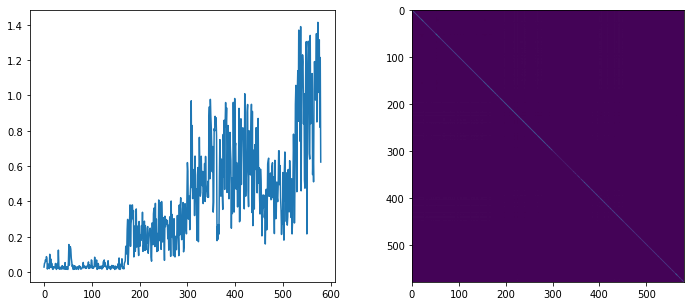

In [3]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].plot(x)
ax[1].imshow(cov)

In [4]:
#best found value for a & H from problemSet 6, Q1 :
a_best = 0.232
h_best = 0.718

In [5]:
def y_th(x,a,H):
    return a*x**H
def dy_da(x,H):
    return x**H
def dy_dH(x,a,H):
    return a*x**H*np.log(x)

def F(faa, faH, fHa, fHH):
    return np.array([[faa,faH], [fHa, fHH]])

def Delta_x(a, h, a_best, h_best, sigma_aa, sigma_hh, rho):
    return ((a-a_best)**2/(sigma_aa**2*(1-rho**2))
           +(h-h_best)**2/((sigma_hh**2)*(1-rho**2))
           -2*rho/(1-rho)*(a-a_best)*(h-h_best)/(sigma_aa*sigma_hh))

In [6]:
faa = dy_da(x, h_best)         @ cov @ dy_da(x, h_best)
faH = dy_da(x, h_best)         @ cov @ dy_dH(x, a_best, h_best)
fHa = dy_dH(x, a_best, h_best) @ cov @ dy_da(x, h_best)
fHH = dy_dH(x, a_best, h_best) @ cov @ dy_dH(x, a_best, h_best)

f = F(faa, faH, fHa, fHH)
c_th = np.linalg.inv(f)

Text(0.5, 0, 'H')

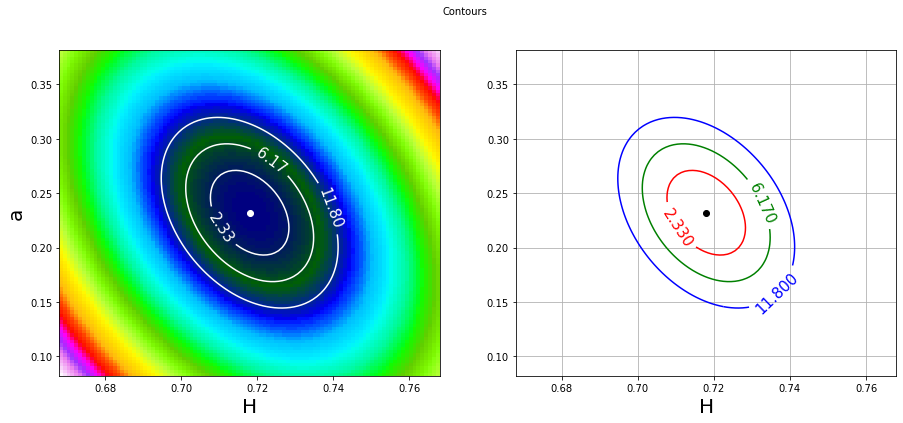

In [7]:
da = .15 ; dh = .05
a = np.linspace(a_best-da,a_best+da,100)
h = np.linspace(h_best-dh,h_best+dh,100)
hh, aa = np.meshgrid(h,a)

rho = c_th[0,1]**2 / (c_th[0,0]*c_th[1,1])
sigma_hh = c_th[0, 0]
sigma_aa = c_th[0, 1]

delta_x = Delta_x(aa, hh, a_best, h_best, sigma_aa, sigma_hh, rho)


fig,ax=plt.subplots(1,2,figsize=(15,6))

ax[0].plot(h_best, a_best, 'wo') ; ax[1].plot(h_best, a_best, 'ko')

plot = ax[0].pcolormesh(hh,aa,delta_x, cmap='gist_ncar', shading='auto')
CS = ax[0].contour(hh,aa,delta_x, [2.33, 6.17, 11.8], colors=('w'))
ax[0].clabel(CS, CS.levels, inline=True, fmt='%1.2f', fontsize=15)

CS = ax[1].contour(hh, aa, delta_x, [2.33, 6.17, 11.8], colors=('r','g','b'), origin='lower')
ax[1].clabel(CS, CS.levels, inline=True, fontsize=15) ; ax[1].grid(True)

plt.suptitle('Contours', fontsize=10) ; ax[0].set_ylabel('a', fontsize=20) ; ax[0].set_xlabel('H', fontsize=20) ; ax[1].set_xlabel('H', fontsize=20)


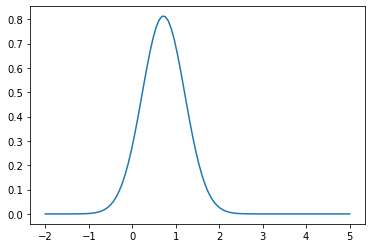

In [8]:
def Rel_H(f_HH, M, this_H, h_best=h_best): 
    d_th = this_H - h_best
    return (f_HH/(2*np.pi)**M)**.5*np.exp(-d_th*f_HH*d_th/2)

dh = 1
h = np.linspace(-2,5,100)
rel_H = []
for this_H in h:
    rel_H.append(Rel_H(f[1][1], 1, this_H))

plt.plot(h, rel_H)

In [9]:
np.trapz(rel_H)*(h[1]-h[0])

0.9999999846198633